In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Function to read data from CSV files
def read_data_from_csv(folder_path):
    dfs = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Path to train and test folders
train_folder = '/content/drive/My Drive/datasets/train'
test_folder = '/content/drive/My Drive/datasets/test'

Mounted at /content/drive


In [ ]:
# Read data from train and test folders
train_data = read_data_from_csv(train_folder)
test_data = read_data_from_csv(test_folder)

In [ ]:

# Split data into features and target variable
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']


In [ ]:

# Encode labels if they are not numerical
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax')) # Output layer

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model using encoded labels
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
223824/223824 [==============================] - 392s 2ms/step - loss: 0.1319 - accuracy: 0.9521 - val_loss: 0.0727 - val_accuracy: 0.9821
Epoch 2/20
223824/223824 [==============================] - 401s 2ms/step - loss: 0.1000 - accuracy: 0.9787 - val_loss: 0.0714 - val_accuracy: 0.9831
Epoch 3/20
223824/223824 [==============================] - 399s 2ms/step - loss: 0.0913 - accuracy: 0.9822 - val_loss: 0.0642 - val_accuracy: 0.9836
Epoch 4/20
223824/223824 [==============================] - 391s 2ms/step - loss: 0.1053 - accuracy: 0.9818 - val_loss: 0.1094 - val_accuracy: 0.9806
Epoch 5/20
223824/223824 [==============================] - 394s 2ms/step - loss: 0.1078 - accuracy: 0.9822 - val_loss: 0.0800 - val_accuracy: 0.9828
Epoch 6/20
223824/223824 [==============================] - 392s 2ms/step - loss: 0.1124 - accuracy: 0.9820 - val_loss: 0.0832 - val_accuracy: 0.9836
Epoch 7/20
223824/223824 [==============================] - 425s 2ms/step - loss: 0.1005 - accuracy:

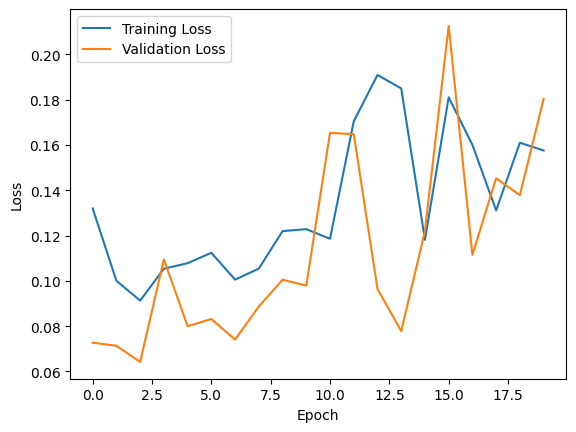

In [ ]:

# Troubleshooting Step 4: Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
# Troubleshooting Step 5: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f"\nTest Accuracy: {test_accuracy}")



110418/110418 [==============================] - 134s 1ms/step - loss: 0.1782 - accuracy: 0.9794

Test Accuracy: 0.9793598055839539


In [ ]:
# Predict probabilities for each class
y_pred_prob = model.predict(X_test_scaled)



110418/110418 [==============================] - 123s 1ms/step


In [ ]:
# Predict class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Decode labels
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print classification report
print(classification_report(y_test_decoded, y_pred_decoded))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

       Backdoor_Malware       0.00      0.00      0.00       267
          BenignTraffic       0.63      1.00      0.77     83268
       BrowserHijacking       0.00      0.00      0.00       426
       CommandInjection       0.00      0.00      0.00       378
 DDoS-ACK_Fragmentation       1.00      0.98      0.99     21759
        DDoS-HTTP_Flood       0.96      0.36      0.52      2163
        DDoS-ICMP_Flood       1.00      1.00      1.00    544992
DDoS-ICMP_Fragmentation       0.95      0.98      0.96     34273
      DDoS-PSHACK_Flood       1.00      1.00      1.00    310418
       DDoS-RSTFINFlood       1.00      1.00      1.00    305877
         DDoS-SYN_Flood       1.00      0.99      0.99    307639
         DDoS-SlowLoris       0.42      0.75      0.53      1789
DDoS-SynonymousIP_Flood       1.00      1.00      1.00    271629
         DDoS-TCP_Flood       1.00      1.00      1.00    340918
         DDoS-UDP_Flood 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[    0   266     0 ...     0     0     0]
 [    0 83113     0 ...     0     0     0]
 [    0   415     0 ...     0     0     0]
 ...
 [    0    99     0 ...     0     0     0]
 [    0    47     0 ...     0  1908     0]
 [    0   282     0 ...     0     0     0]]
